# Context Classifier for Semantic Histograms
## Obtain semantic histogram using KittiSeg Notebook then run this notebook on the output CSV.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import itertools
import pickle

/mnt/storage/home/ja17618/.conda/envs/vox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/storage/home/ja17618/.conda/envs/vox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(1,figsize=(14,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Context Detection using Image Segmentation')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('cdis.png',dpi=300)

In [3]:
seg_data = pd.read_csv('seg.csv',)

In [5]:
X = seg_data.drop('y',axis=1)
y =seg_data['y']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  


In [7]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
cnf_matrix = confusion_matrix(y_test,y_pred,labels=['urban','non-urban'])  
plot_confusion_matrix
print(classification_report(y_test,y_pred))  

NameError: name 'y_test' is not defined

In [47]:
y_pred = svclassifier.predict(X_test)  
print(y_pred)
y_test1 = [np.where(y_t == 1, 'urban', 'non-urban') for y_t in y_test]
y_pred1 = [np.where(y_t == 1, 'urban', 'non-urban') for y_t in y_pred]

[1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 1]


Confusion matrix, without normalization
[[174  19]
 [ 42 176]]
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       193
          1       0.90      0.81      0.85       218

avg / total       0.86      0.85      0.85       411



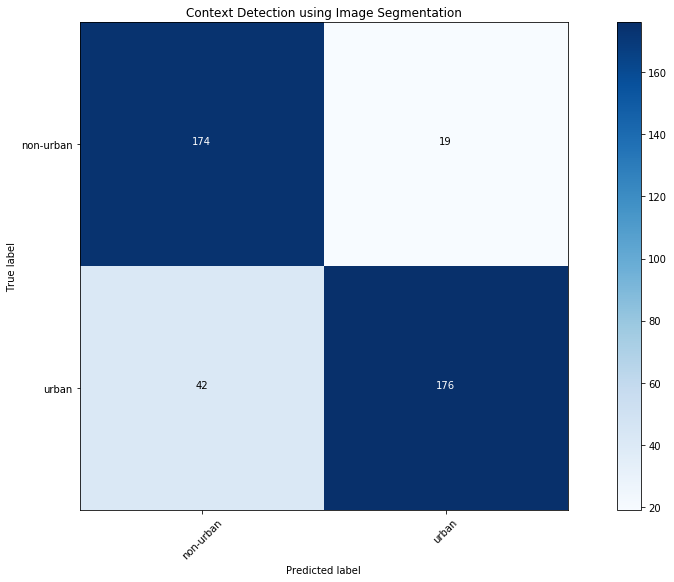

In [48]:
class_names=['non-urban','urban']
cnf_matrix = confusion_matrix(y_test,y_pred)  
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
print(classification_report(y_test,y_pred))  


In [2]:
def save_model(filename='/mnt/storage/home/ja17618/workspace/image_context.sav'):
    pickle.dump(svclassifier, open(filename, 'wb'))
